In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

data = {
    "Customer ID": range(1, 11),
    "Age": [19, 21, 20, 23, 31, 22, 35, 40, 29, 30],
    "Annual Income": [15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
    "Spending Score": [39, 81, 6, 77, 40, 76, 6, 94, 3, 72]
}

In [5]:
df = pd.DataFrame(data)
df.to_csv("customer_data.csv", index=False)
df = pd.read_csv("customer_data.csv")
df

,Customer ID,Age,Annual Income,Spending Score
0,1,19,15,39
1,2,21,16,81
2,3,20,17,6
3,4,23,18,77
4,5,31,19,40
5,6,22,20,76
6,7,35,21,6
7,8,40,22,94
8,9,29,23,3
9,10,30,24,72


In [6]:
print("Shape of the dataset:", df.shape)
print("Missing values:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())
print("Data types:\n", df.dtypes)
print("\nSummary statistics:\n", df.describe())

Shape of the dataset: (10, 4)
Missing values:
 Customer ID       0
Age               0
Annual Income     0
Spending Score    0
dtype: int64
Duplicate rows: 0
Data types:
 Customer ID       int64
Age               int64
Annual Income     int64
Spending Score    int64
dtype: object

Summary statistics:
        Customer ID        Age  Annual Income  Spending Score
count     10.00000  10.000000       10.00000       10.000000
mean       5.50000  27.000000       19.50000       49.400000
std        3.02765   7.086764        3.02765       35.094159
min        1.00000  19.000000       15.00000        3.000000
25%        3.25000  21.250000       17.25000       14.250000
50%        5.50000  26.000000       19.50000       56.000000
75%        7.75000  30.750000       21.75000       76.750000
max       10.00000  40.000000       24.00000       94.000000


In [7]:
features_to_scale = ["Age", "Annual Income", "Spending Score"]
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

print("\nStandardized Data:\n", df_scaled.head())


Standardized Data:
    Customer ID       Age  Annual Income  Spending Score
0            1 -1.189928      -1.566699       -0.312376
1            2 -0.892446      -1.218544        0.949142
2            3 -1.041187      -0.870388       -1.303568
3            4 -0.594964      -0.522233        0.828997
4            5  0.594964      -0.174078       -0.282340


In [11]:
features = ["Age", "Annual Income", "Spending Score"]
scaler = StandardScaler()
X = scaler.fit_transform(df[features])
X

array([[-1.18992823, -1.5666989 , -0.3123757 ],
       [-0.89244618, -1.21854359,  0.94914155],
       [-1.04118721, -0.87038828, -1.30356783],
       [-0.59496412, -0.52223297,  0.82899705],
       [ 0.59496412, -0.17407766, -0.28233958],
       [-0.74370515,  0.17407766,  0.79896093],
       [ 1.18992823,  0.52223297, -1.30356783],
       [ 1.93363338,  0.87038828,  1.33961118],
       [ 0.29748206,  1.21854359, -1.39367621],
       [ 0.44622309,  1.5666989 ,  0.67881643]])

In [14]:
wcss = []
sil_scores = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, kmeans.labels_))

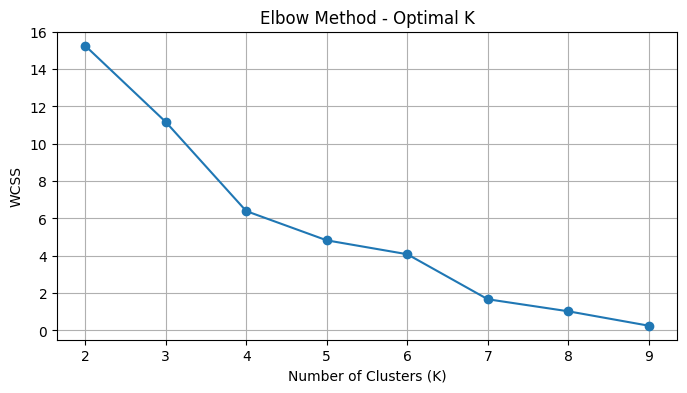

In [15]:
plt.figure(figsize=(8, 4))
plt.plot(K_range, wcss, marker='o')
plt.title("Elbow Method - Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()


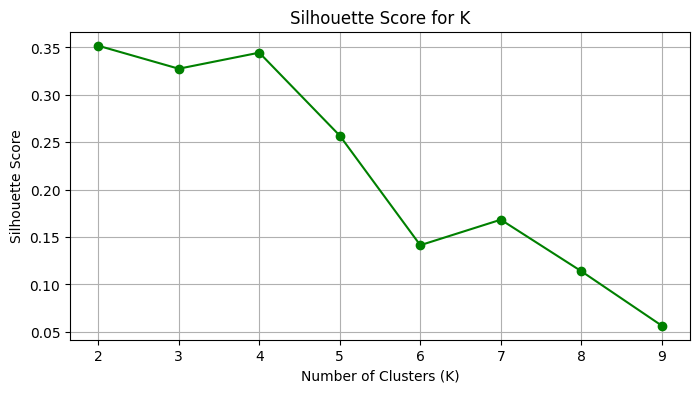

In [16]:
plt.figure(figsize=(8, 4))
plt.plot(K_range, sil_scores, marker='o', color='green')
plt.title("Silhouette Score for K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [18]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)
df

,Customer ID,Age,Annual Income,Spending Score,Cluster
0,1,19,15,39,2
1,2,21,16,81,0
2,3,20,17,6,2
3,4,23,18,77,0
4,5,31,19,40,1
5,6,22,20,76,0
6,7,35,21,6,1
7,8,40,22,94,1
8,9,29,23,3,1
9,10,30,24,72,1


In [20]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]
df

,Customer ID,Age,Annual Income,Spending Score,Cluster,PCA1,PCA2
0,1,19,15,39,2,-1.964176,-0.181211
1,2,21,16,81,0,-1.432244,1.047359
2,3,20,17,6,2,-1.428209,-1.223650
3,4,23,18,77,0,-0.738475,0.871960
4,5,31,19,40,1,0.280758,-0.274230
5,6,22,20,76,0,-0.354649,0.790816
6,7,35,21,6,1,1.130302,-1.351027
7,8,40,22,94,1,2.061174,1.250770
8,9,29,23,3,1,0.984840,-1.484720
9,10,30,24,72,1,1.460679,0.553933


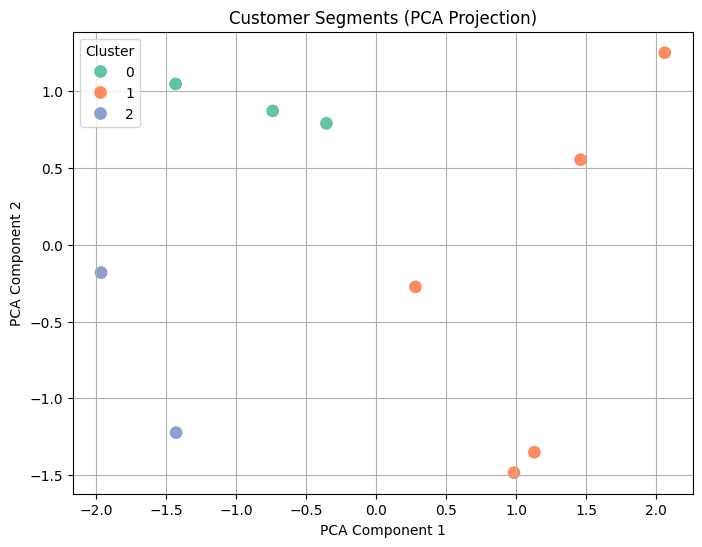

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title("Customer Segments (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


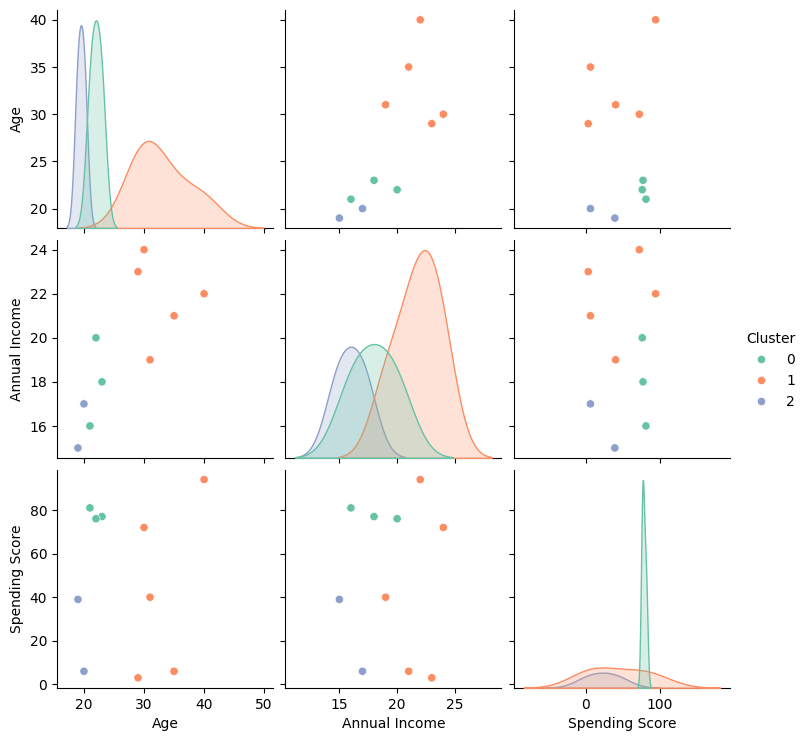

In [22]:
sns.pairplot(df[features + ['Cluster']], hue='Cluster', palette='Set2')
plt.show()


In [23]:
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
print("Cluster Centroids:\n", centroids)

Cluster Centroids:
     Age  Annual Income  Spending Score
0  22.0           18.0            78.0
1  33.0           21.8            43.0
2  19.5           16.0            22.5


In [27]:
df.to_csv("clustered_customer_data.csv", index=False)
df.to_csv

<bound method NDFrame.to_csv of    Customer ID  Age  Annual Income  Spending Score  Cluster      PCA1  \
0            1   19             15              39        2 -1.964176   
1            2   21             16              81        0 -1.432244   
2            3   20             17               6        2 -1.428209   
3            4   23             18              77        0 -0.738475   
4            5   31             19              40        1  0.280758   
5            6   22             20              76        0 -0.354649   
6            7   35             21               6        1  1.130302   
7            8   40             22              94        1  2.061174   
8            9   29             23               3        1  0.984840   
9           10   30             24              72        1  1.460679   

       PCA2  
0 -0.181211  
1  1.047359  
2 -1.223650  
3  0.871960  
4 -0.274230  
5  0.790816  
6 -1.351027  
7  1.250770  
8 -1.484720  
9  0.553933  >